In [1]:
import numpy as np
import pandas as pd

In [2]:
trainData = pd.read_csv("/Users/Datasets/playground S3E3_Attrition/train.csv", index_col = 'id')
testData = pd.read_csv("/Users/Datasets/playground S3E3_Attrition/test.csv", index_col = 'id')
print(" Train data Shape: " ,trainData.shape)
print(" Test data Shape: " ,testData.shape)

 Train data Shape:  (1677, 34)
 Test data Shape:  (1119, 33)


In [3]:
testData.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,...,4,80,0,1,2,2,1,0,0,0
1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,...,3,80,1,7,3,3,2,2,2,2
1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,...,2,80,2,13,2,2,7,7,1,7
1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,...,3,80,0,14,2,2,14,10,11,8
1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,...,1,80,0,1,5,3,1,0,0,0


# Data Cleaning

Get Information on Dataset

In [4]:
trainData. info(), testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EmployeeCount             1677 non-null   int64 
 8   EnvironmentSatisfaction   1677 non-null   int64 
 9   Gender                    1677 non-null   object
 10  HourlyRate                1677 non-null   int64 
 11  JobInvolvement            1677 non-null   int64 
 12  JobLevel                  1677 non-null   int64 
 13  JobRole                   1677 non-null   object
 14  JobSatisfaction         

(None, None)

Check for missing values

In [5]:
trainData. isna().sum(), testData. isna().sum()

(Age                         0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsInCurrentRole          0
 YearsSinceLastPromotion     0
 YearsWi

Check for Duplicate

In [6]:
trainData.duplicated().sum()

0

# Data Visualization

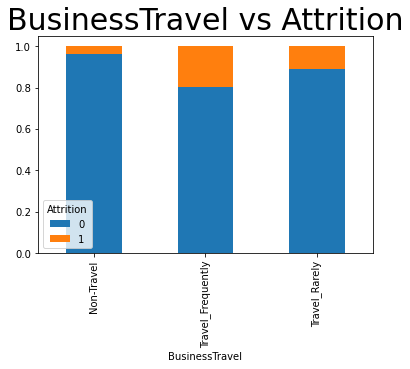

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.crosstab(trainData['BusinessTravel'], trainData['Attrition'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('BusinessTravel vs Attrition', fontsize = 30)
plt.show()

from the above it shows that business travels has no effect on the staff perfomance

<Figure size 1440x1080 with 0 Axes>

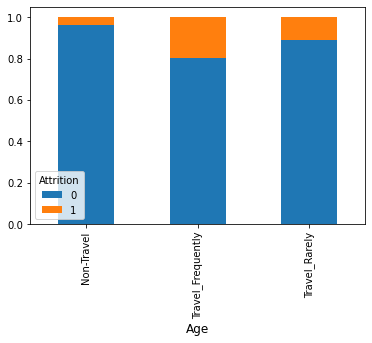

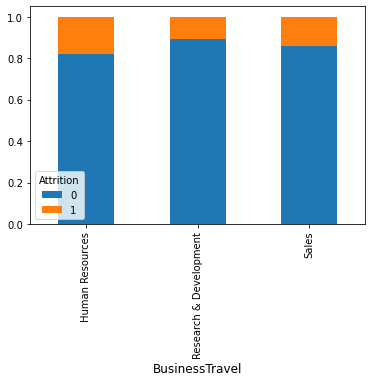

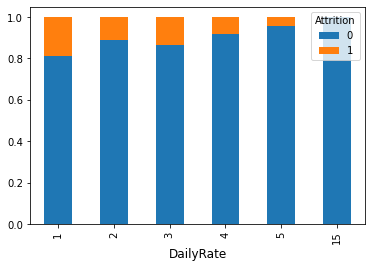

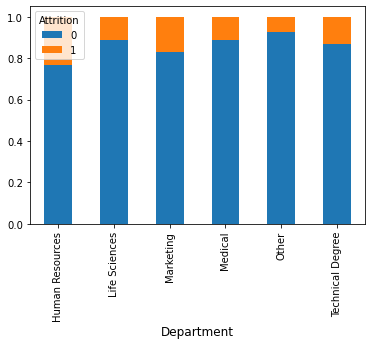

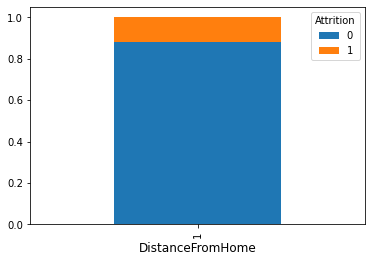

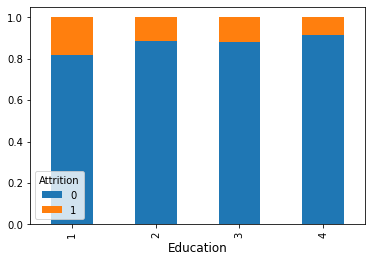

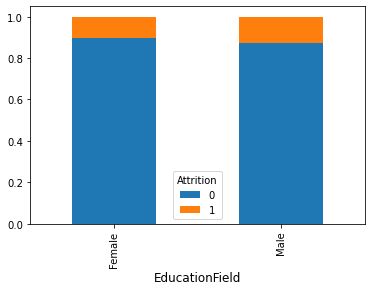

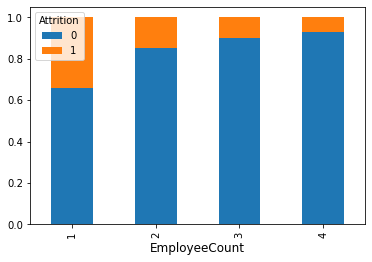

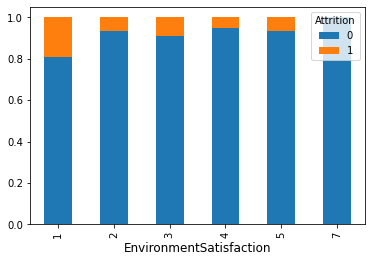

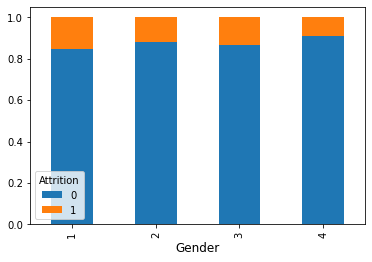

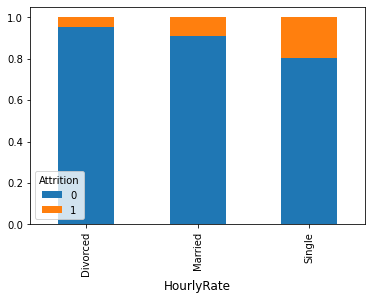

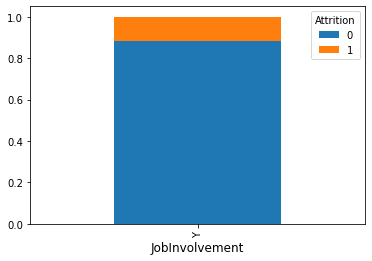

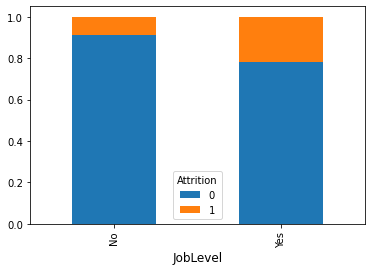

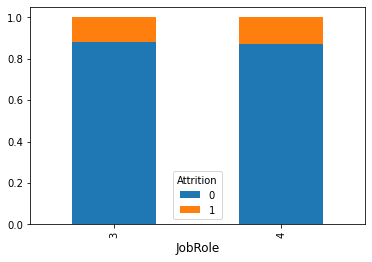

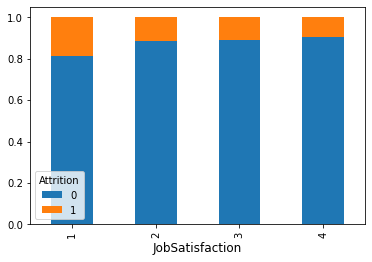

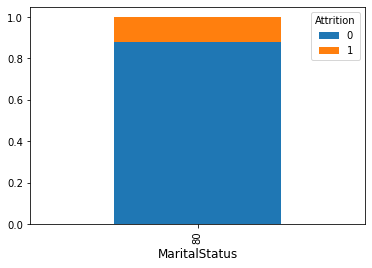

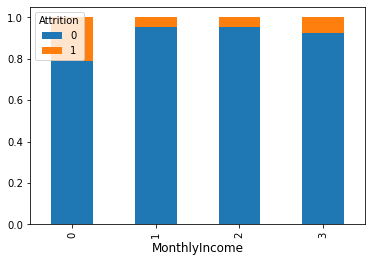

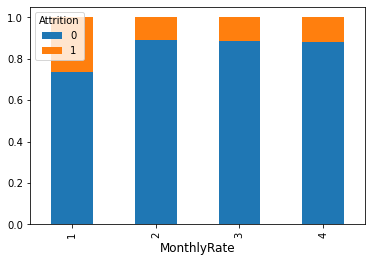

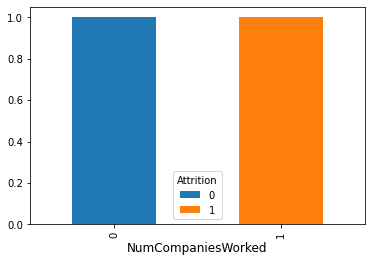

In [8]:
s =  trainData.nunique() >= 7
uniqueVal = list(s[s].index)
relationDataset= trainData.drop(uniqueVal, axis = 1)
plt.figure(figsize=(20, 15))
for i in range(len(relationDataset.columns)):
    #plt.subplot(3,4,i)
    df = pd.crosstab(relationDataset.iloc[:,i], trainData['Attrition'])
    df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
    plt.xlabel(trainData.columns[i], size =12)

Encoding

In [9]:
targetVariable = trainData.Attrition
inputVariable = trainData. drop(['Attrition'], axis = 1)
inputVariable

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,2,80,1,10,2,3,10,0,7,8
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,4,80,1,4,3,3,4,2,0,3
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,4,80,2,4,3,3,3,2,1,2
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,3,80,0,15,1,1,6,0,0,2
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,3,80,0,31,0,3,31,14,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,Female,...,2,80,0,10,2,4,10,0,0,8
1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,Male,...,4,80,1,10,3,4,4,2,1,3
1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,Male,...,3,80,0,1,2,3,1,0,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

#targetVar = trainData.Attrition

"""class ExtractNumVariable(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        s = (X.dtypes == 'int64')
        object_cols = list(s[s].index)
        return X[object_cols]
    """

class EncodeCategoricalVariable(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        s = (X.dtypes == 'object')
        object_cols = list(s[s].index)
        encoder = OneHotEncoder(handle_unknown="ignore")
        X_encoded = encoder.fit_transform(X[object_cols])
        X.drop(object_cols, axis=1, inplace=True)
        X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=encoder.get_feature_names())
        X = pd.concat([X, X_encoded_df], axis=1)
        return X

In [11]:
catVar =EncodeCategoricalVariable()
encodedData = catVar.fit_transform(inputVariable)
encodedData

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,x4_Research Director,x4_Research Scientist,x4_Sales Executive,x4_Sales Representative,x5_Divorced,x5_Married,x5_Single,x6_Y,x7_No,x7_Yes
0,36,599,24,3,1,4,42,3,1,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,35,921,8,3,1,1,46,3,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,32,718,26,3,1,3,80,3,2,4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,38,1488,2,3,1,3,40,3,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,50,1017,5,4,1,2,37,3,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,945,1,3,1,4,73,3,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1673,32,1303,2,3,1,1,48,3,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1674,29,1184,24,3,1,2,36,2,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1675,36,441,9,2,1,2,48,4,2,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [12]:
encodedTestData = catVar.fit_transform(testData).fillna(0)
encodedTestData

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,x4_Research Director,x4_Research Scientist,x4_Sales Executive,x4_Sales Representative,x5_Divorced,x5_Married,x5_Single,x6_Y,x7_No,x7_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,31.0,755.0,1.0,1.0,1.0,3.0,81.0,2.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2792,40.0,654.0,26.0,5.0,1.0,3.0,96.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2793,42.0,884.0,1.0,4.0,1.0,2.0,65.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2794,25.0,1469.0,1.0,2.0,1.0,3.0,68.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Check for Multicoliniarity

<AxesSubplot:>

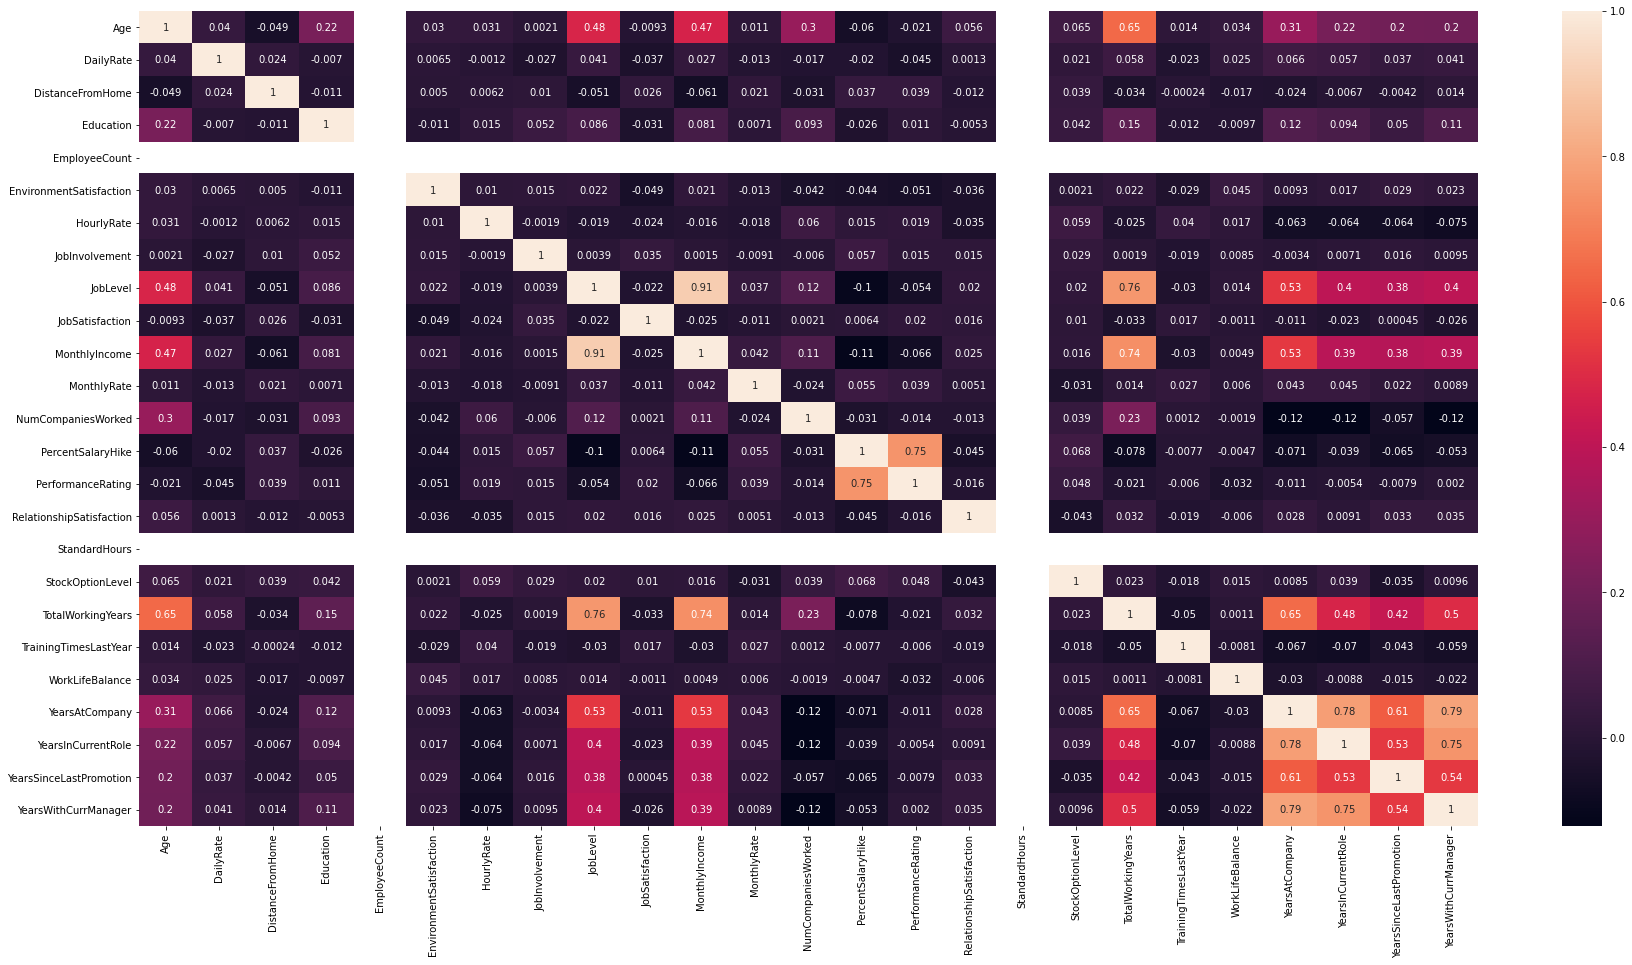

In [13]:
pd.set_option('display.width', 100)

plt.figure(figsize=(30,15))

#sns. heatmap(data.corr())

sns.heatmap(inputVariable.corr(), annot= True)

From th Above Heatmap, There is corrletion between the following features:

Employeecount and StandardHours
PercentSalaryHike and PerformanceRating
JobLevel and MonthlyIncome
JobLevel and TotalWorking Years
MonthlyIncome and TotalWorking Years
YearsAtCompany and YearsInCurrentRole YearsWithCurrManager
So Drop Employeecount,YearsInCurrentRole, YearsWithCurrManager,TotalWorking Years,MonthlyIncome and StandardHours

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.columns is None:
            return X
        else:
            return X.drop(columns=self.columns)

In [15]:
column = ColumnDropper( )
columnDropped = column.fit_transform(encodedData)

Checking for outliers

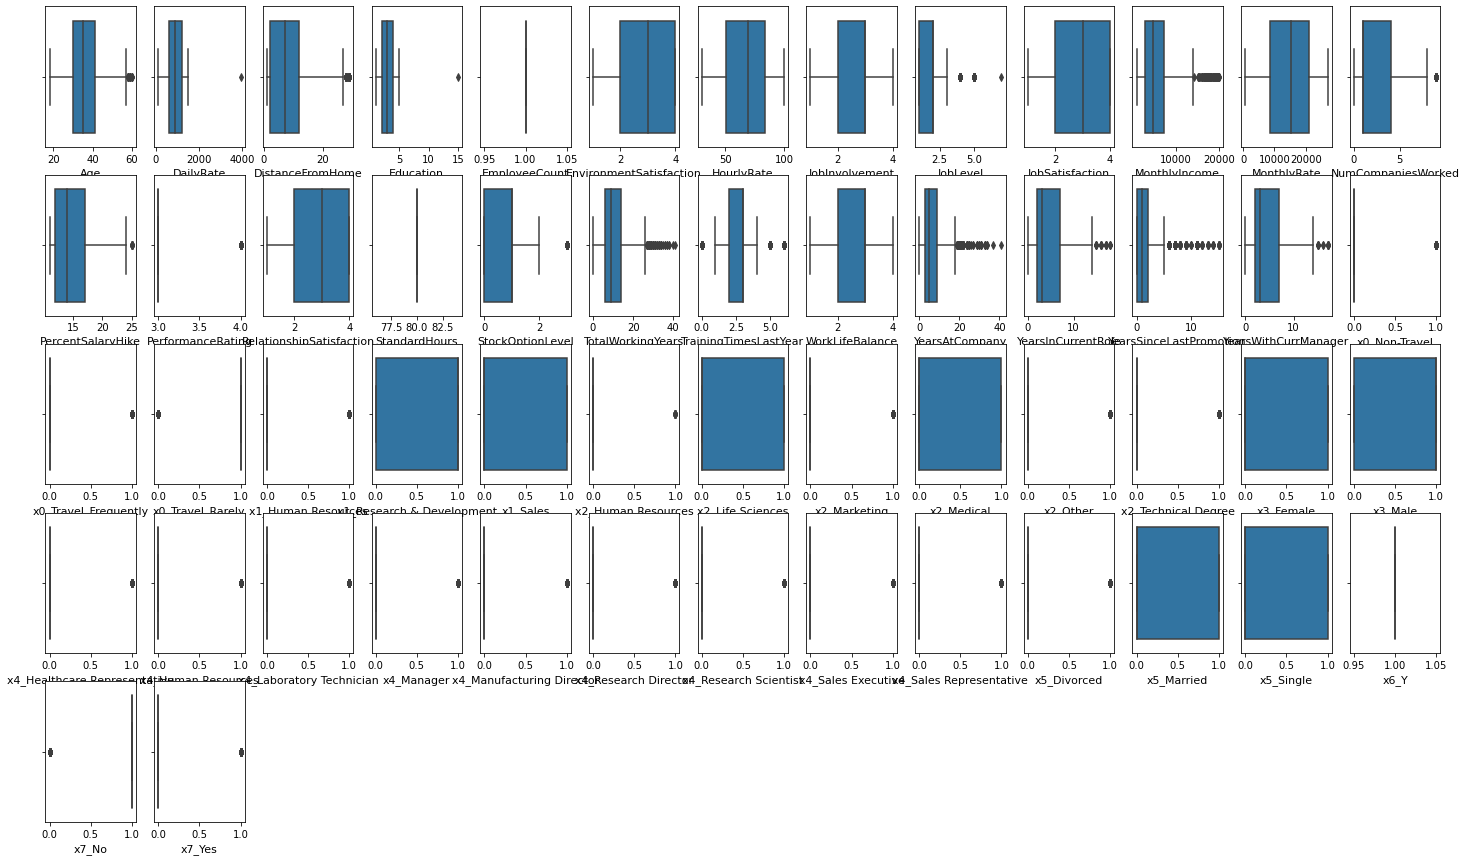

In [16]:
plt.figure(figsize=(25, 15))
for i in range(len(columnDropped.columns)):
    plt.subplot(5,13,i+1)
    sns.boxplot(x =columnDropped.iloc[:, i])
    plt.xlabel(columnDropped.columns[i], size =11)
plt.show()

In [17]:
from scipy.stats import zscore

# Calculate the z-score for each data point
z = np.abs(zscore(columnDropped))

# Remove outliers based on the z-score
df = columnDropped[(z < 3).all(axis=1)]

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on the IQR
columnDropped = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data Transformation

In [18]:
columnDropped.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'x0_Non-Travel',
       'x0_Travel_Frequently', 'x0_Travel_Rarely', 'x1_Human Resources',
       'x1_Research & Development', 'x1_Sales', 'x2_Human Resources', 'x2_Life Sciences',
       'x2_Marketing', 'x2_Medical', 'x2_Other', 'x2_Technical Degree', 'x3_Female', 'x3_Male',
       'x4_Healthcare Representative', 'x4_Human Resources', 'x4_Laboratory Technician',
       'x4_Manager', 'x4_Manufacturing Director', 'x4_Research Director', 'x4_Research Scientist',
       'x4_Sales 

In [19]:
from sklearn.preprocessing import MinMaxScaler
class RescaleData(BaseEstimator, TransformerMixin):
    def __init__(self, scaler='standard'):
        self.scaler = scaler
        if scaler == 'standard':
            self.scaler_ = StandardScaler()
        elif scaler == 'minmax':
            self.scaler_ = MinMaxScaler()
        else:
            raise ValueError('Invalid scaler type specified.')
    
    def fit(self, X, y=None):
        self.scaler_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.scaler_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.scaler_.fit_transform(X)

In [20]:
from sklearn.preprocessing import Normalizer,StandardScaler

class NormalizeData(BaseEstimator, TransformerMixin):
    def __init__(self, norm='l2'):
        self.norm = norm
        self.normalizer_ = Normalizer(norm=self.norm)
    
    def fit(self, X, y=None):
        self.normalizer_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.normalizer_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.normalizer_.fit_transform(X)

# Feature Selection

In [21]:
from sklearn.feature_selection import SelectKBest,chi2, RFE,mutual_info_classif

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y=None):
        from sklearn.feature_selection import SelectKBest, f_regression
        self.selector = SelectKBest(f_regression, k=self.k)
        self.selector.fit(X, y)
        return self
        
    def transform(self, X):
        return self.selector.transform(X)
    
    def get_support(self, indices=False):
        return self.selector.get_support(indices=indices)

pipeline

In [22]:
from sklearn.pipeline import Pipeline
encoder = EncodeCategoricalVariable()
columndropper = ColumnDropper(['EmployeeCount','YearsInCurrentRole',  'YearsWithCurrManager',
                                'TotalWorkingYears','MonthlyIncome', 'StandardHours'])
rescale  = RescaleData(scaler='standard')
normalize = NormalizeData(norm='l2')
featureSelect = FeatureSelection(k=10)

pipeline1 = Pipeline(steps=[('columndropper', columndropper),('rescale', rescale), ('normalize', normalize),('featureSelect', featureSelect)])
processedData = pipeline1.fit_transform(encodedData,targetVariable )

/Users/Blessing/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/Blessing/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/Blessing/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Model Building

Select the best model

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

X = processedData

Y =  targetVariable.values # outcome variable
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
models = []

#models. append(('XGB',XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)))
models.append(('LD', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier(random_state=1)))


# evaluate each model in turn
              
Results = []
Predicts = []
names = []
#comparing multiple Algorithm

for name, model in models:
   
    results = cross_val_score(model, X, Y, cv=kfold)
    resultsMean = results.mean()
    Y_predict = cross_val_predict(model, X, Y, cv=kfold)
    Results.append(resultsMean)
    MAE = mae(Y,Y_predict)
    Predicts.append(MAE)
    names.append(name)
    msg = (name, resultsMean,MAE)
    print(msg)
              

('LD', 0.8831372968349015, 0.11687537268932618)
('GNB', 0.8378493013972056, 0.16219439475253428)
('DTC', 0.8092065868263474, 0.18783542039355994)
('RFC', 0.8849408326204735, 0.11508646392367322)


The best Model to use is the Random Forest Classifer

Predict with test Data

In [25]:
# Preprocess the test data using the same pipeline as for training data
processed_test_data = pipeline1.transform(encodedTestData)

# Ensure that the processed test data has the same columns as the processed training data
processed_test_data = pd.DataFrame(processed_test_data, columns=pipeline1['featureSelect'].get_support(indices=True))

# Make predictions using the fitted model and processed test data
model1 = RandomForestClassifier(random_state=1)
fitModel = model1.fit(processedData, targetVariable)
preds = pd.DataFrame({'id': processed_test_data.index, 'Attrition': fitModel.predict(processed_test_data)})
preds.to_csv('/Users/Datasets/playground S3E3_Attrition/playGround.csv', index=False)

print("Your submission was successfully saved!")


/Users/Blessing/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Your submission was successfully saved!
